In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_set = "drive/MyDrive/stroke_data.csv"

In [ ]:
data = pd.read_csv(data_set)

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data.shape

(5110, 12)

In [ ]:
data.set_index('id', inplace=True)

In [ ]:
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
data.describe

<bound method NDFrame.describe of        gender   age  hypertension  heart_disease ever_married      work_type  \
id                                                                             
9046     Male  67.0             0              1          Yes        Private   
51676  Female  61.0             0              0          Yes  Self-employed   
31112    Male  80.0             0              1          Yes        Private   
60182  Female  49.0             0              0          Yes        Private   
1665   Female  79.0             1              0          Yes  Self-employed   
...       ...   ...           ...            ...          ...            ...   
18234  Female  80.0             1              0          Yes        Private   
44873  Female  81.0             0              0          Yes  Self-employed   
19723  Female  35.0             0              0          Yes  Self-employed   
37544    Male  51.0             0              0          Yes        Private   
44679 

In [ ]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
num_col=data.select_dtypes(include=['int','float'])
cat_col=data.select_dtypes(include='object')

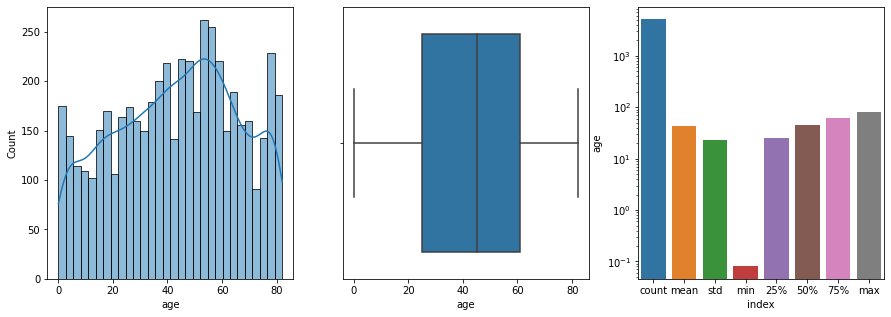

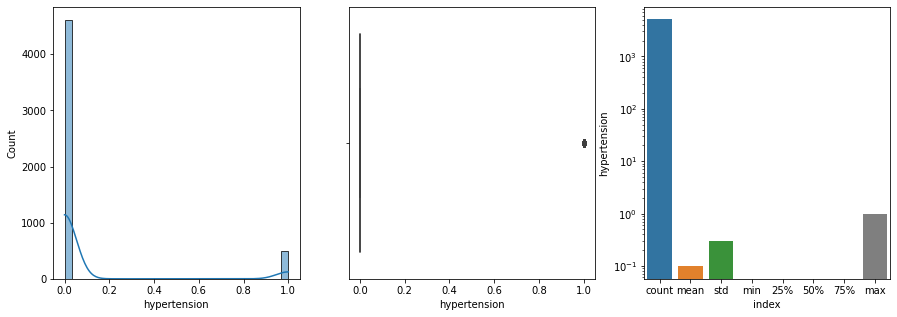

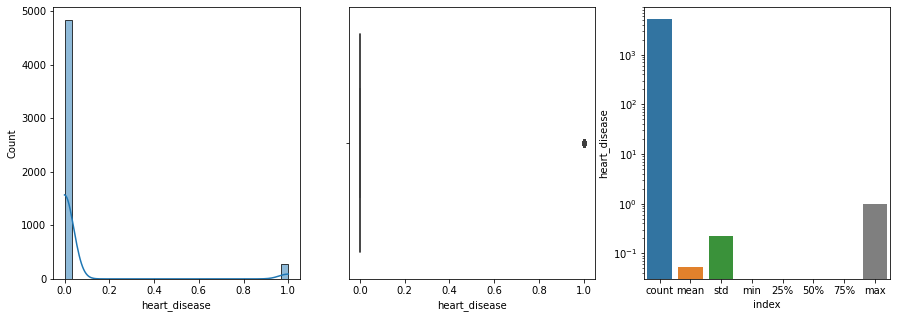

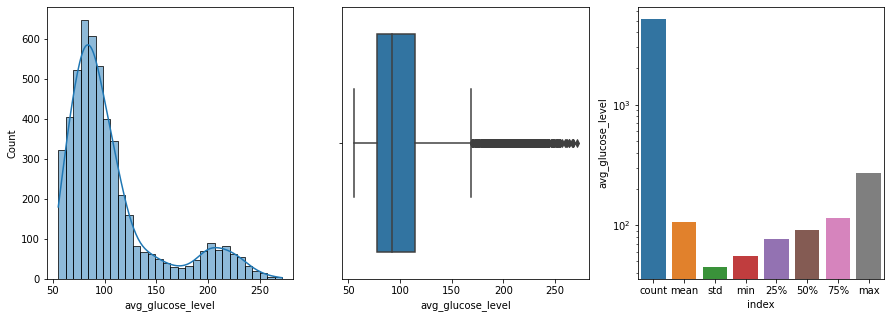

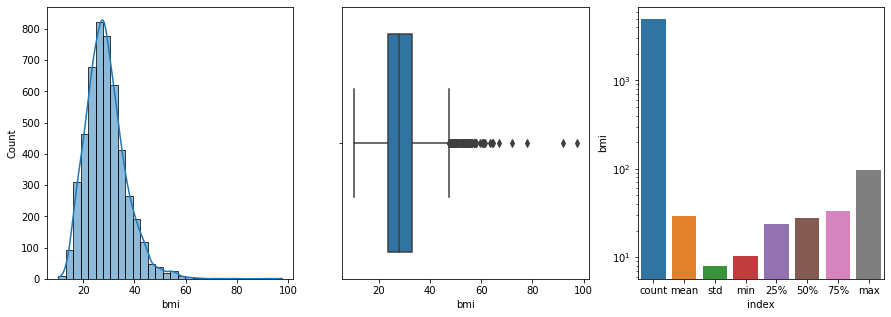

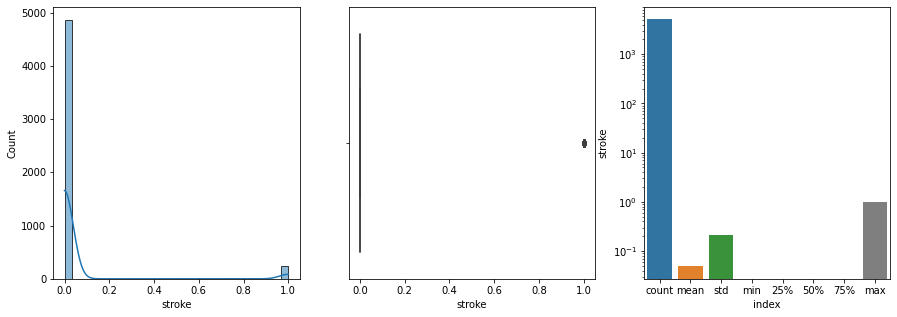

In [ ]:
for col in num_col:
    fig, axs = plt.subplots(1,3,figsize=(15,5))
    sns.histplot(data=data, x=col, bins=30, kde=True,ax = axs[0])
    sns.boxplot(x=data[col], ax=axs[1])
    g=sns.barplot(data= data[col].describe().reset_index(), x='index', y=col, ax=axs[2])
    g.set_yscale("log")

In [ ]:
data['bmi'].fillna(method='ffill', inplace=True)

In [ ]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

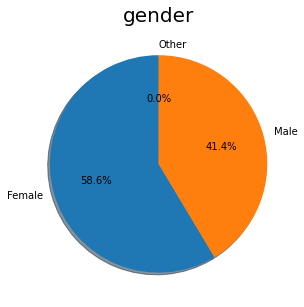

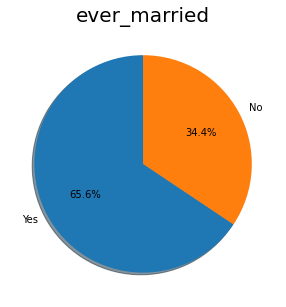

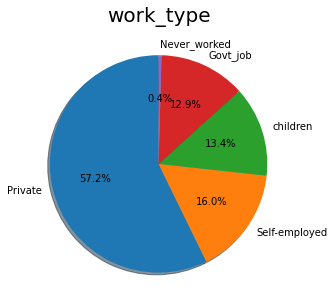

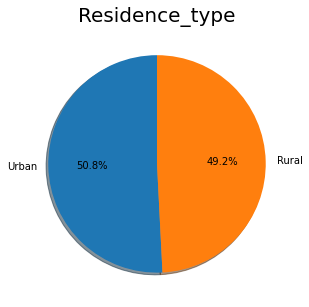

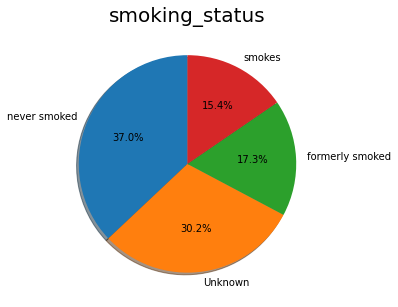

In [ ]:
for col in cat_col:
    fig = plt.subplots(figsize=(12,5))
    labels = data[col].value_counts().index
    sizes = data[col].value_counts()
    plt.pie(sizes, labels = labels, shadow = True, autopct='%1.1f%%',startangle = 90)
    plt.title(col, fontsize = 20)

In [ ]:
def compute_correlations_price_ratio(dataset):
  correlations = dataset.corr()
  res = correlations["stroke"].abs().sort_values(ascending=False)
  print(res)
compute_correlations_price_ratio(data)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.043840
Name: stroke, dtype: float64


<AxesSubplot:>

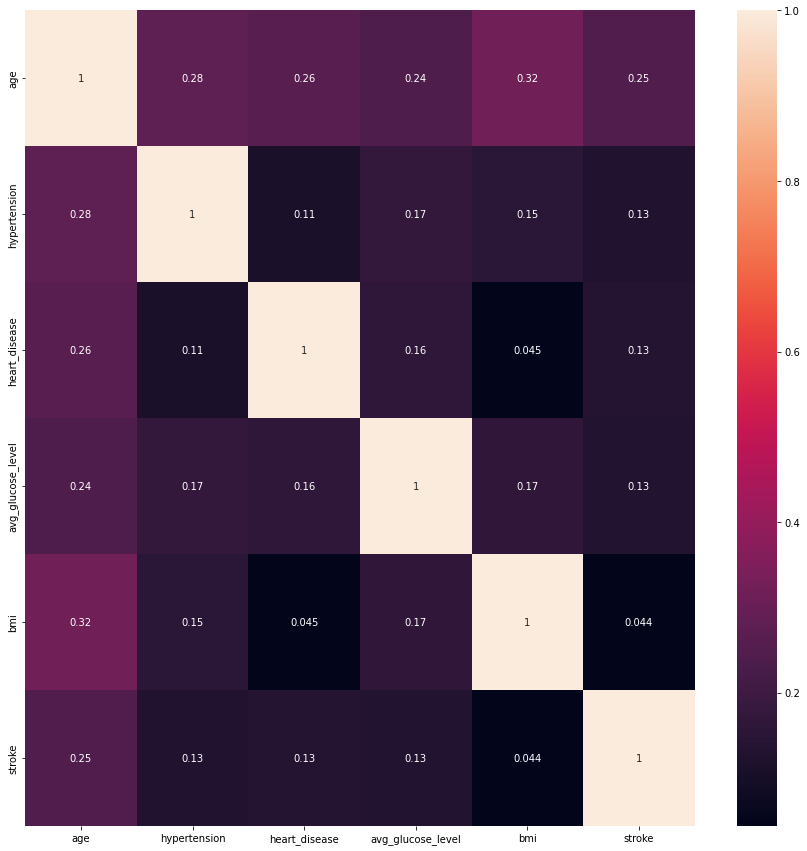

In [ ]:
plt.figure(figsize= (15, 15))
sns.heatmap(data.corr(), annot=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["gender"] = le.fit_transform(data["gender"].astype('str'))
data["ever_married"] = le.fit_transform(data["ever_married"].astype('str'))
data["work_type"] = le.fit_transform(data["work_type"].astype('str'))
data["Residence_type"] = le.fit_transform(data["Residence_type"].astype('str'))
data["smoking_status"] = le.fit_transform(data["smoking_status"].astype('str'))

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
51676,0,61.0,0,0,1,3,0,202.21,36.6,2,1
31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [ ]:
selected_col = ['age','avg_glucose_level','bmi','stroke']
cluster = data.loc[:,selected_col]

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
cluster_data = ss.fit_transform(cluster)

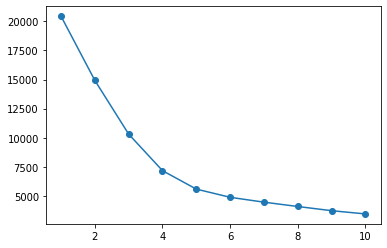

In [ ]:
from sklearn.cluster import KMeans
inertia = []
clusters_range = range(1,11)

for i in clusters_range:
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, random_state = 0)
    kmeans.fit(cluster_data)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters_range, inertia, marker='o')

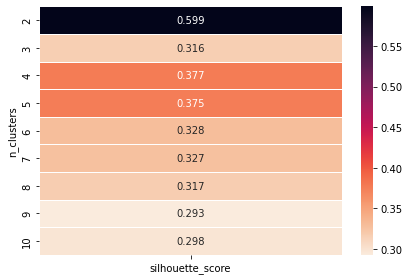

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range = range(2,11)
results =[]

for k in clusters_range:
  clusterer = KMeans(n_clusters=k, random_state=0)
  cluster_label = clusterer.fit_predict(cluster_data)
  silhouette_avg = silhouette_score(cluster_data, cluster_label)
  results.append([k, silhouette_avg])

result = pd.DataFrame(results, columns=['n_clusters','silhouette_score'])
pivot_km = pd.pivot_table(result, index='n_clusters', values='silhouette_score')

plt.figure()
sns.heatmap(pivot_km, annot=True, linewidth=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

In [ ]:
kmeans_sel = KMeans(n_clusters=3, random_state=0)
kmeans_sel.fit(cluster_data)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster.assign(Clusters=labels)

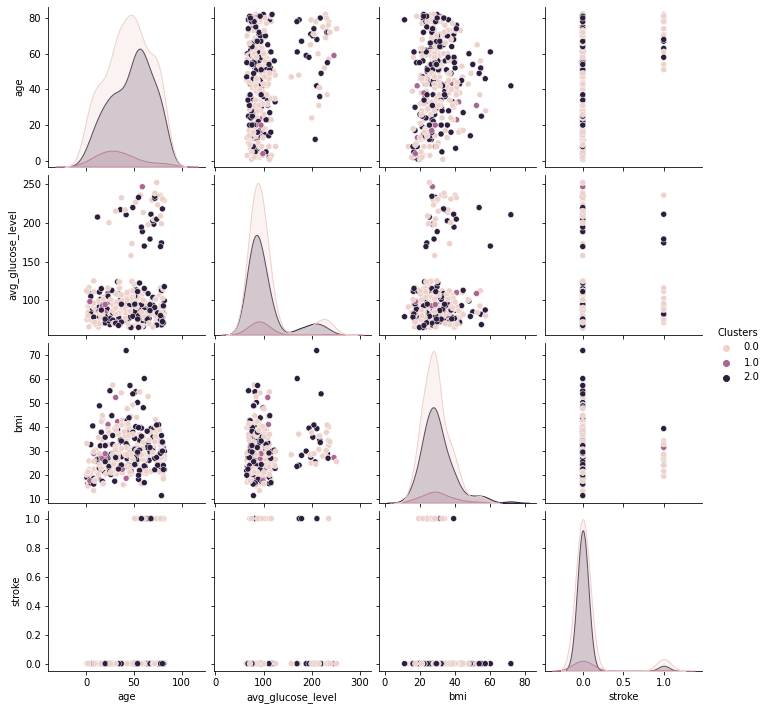

In [ ]:
sns.pairplot(data=clustered_data, hue='Clusters')

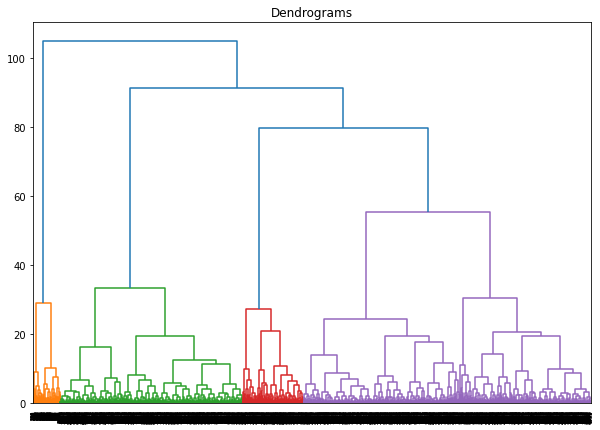

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(cluster_data, method='ward'))

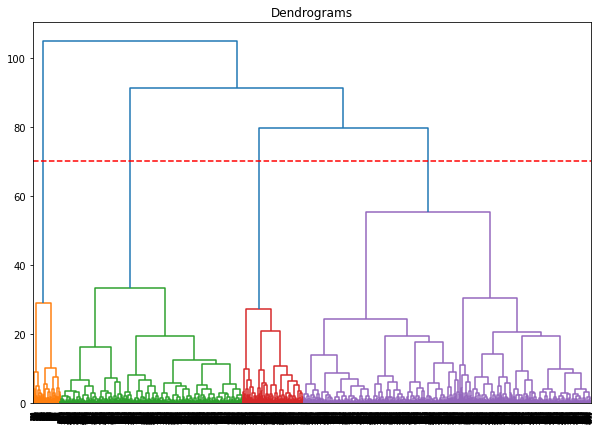

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(cluster_data, method='ward'))
plt.axhline(y=70, color='r', linestyle='--')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster_h = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster_h.fit_predict(cluster_data)

array([1, 1, 1, ..., 2, 3, 2])

In [ ]:
labels = pd.DataFrame(cluster_h.labels_)
clustered_data_h = cluster_h.assign(Clusters=labels)

AttributeError: ignored

<AxesSubplot:xlabel='bmi', ylabel='avg_glucose_level'>

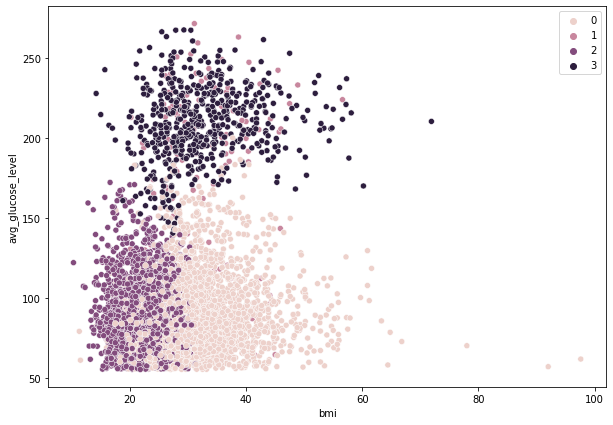

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=data['bmi'], y=data['avg_glucose_level'], hue=cluster_h.labels_)